In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv("adult_mortality_indonesia.csv")
df["imp_male"] = np.log(df["male"] / df["male"].shift(1))
df["imp_female"] = np.log(df["female"] / df["female"].shift(1))
df = df.dropna().reset_index(drop=True)
df.head()

,year,female,male,imp_male,imp_female
0,1991,183.488,229.230,-0.024417,-0.011574
1,1992,179.502,224.371,-0.021425,-0.021963
2,1993,170.382,216.580,-0.035341,-0.052143
3,1994,174.249,215.981,-0.002770,0.022442
4,1995,176.742,215.629,-0.001631,0.014206


# MPI Plot

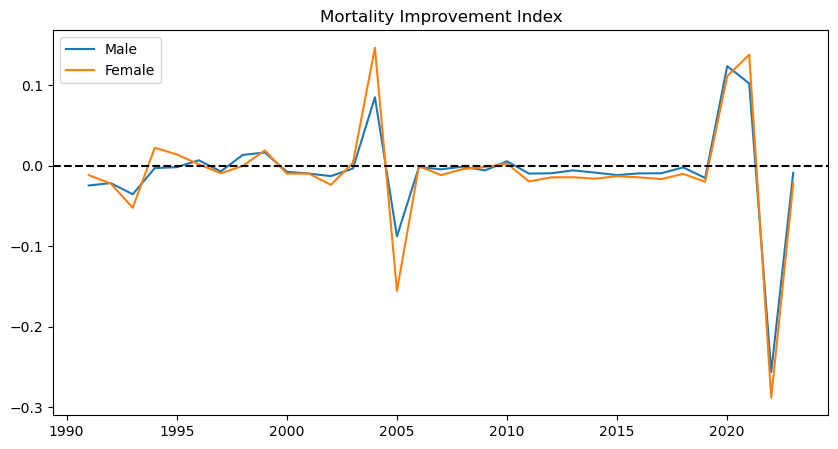

In [3]:
plt.figure(figsize=(10,5))
plt.plot(df["year"], df["imp_male"], label="Male")
plt.plot(df["year"], df["imp_female"], label="Female")
plt.axhline(0, color="black", linestyle="--")
plt.title("Mortality Improvement Index")
plt.legend()
plt.show()

# Rolling Volatility

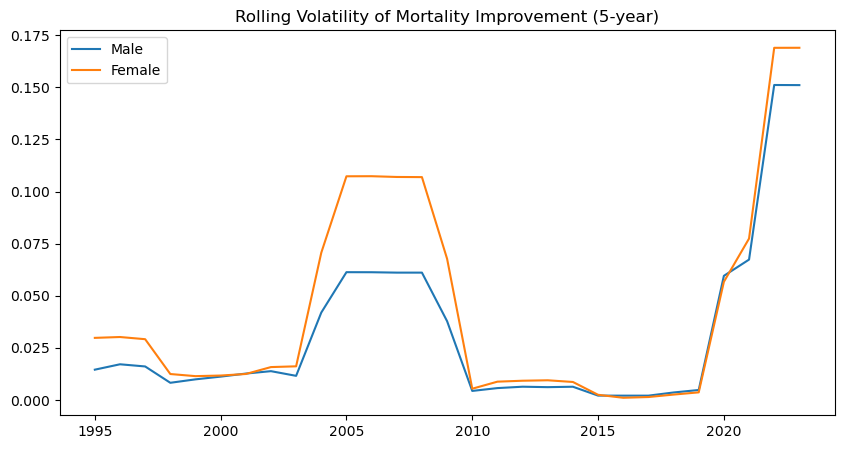

In [4]:
window = 5
df["vol_male"] = df["imp_male"].rolling(window).std()
df["vol_female"] = df["imp_female"].rolling(window).std()

plt.figure(figsize=(10,5))
plt.plot(df["year"], df["vol_male"], label="Male")
plt.plot(df["year"], df["vol_female"], label="Female")
plt.title("Rolling Volatility of Mortality Improvement (5-year)")
plt.legend()
plt.show()

## Modeling Mortality Improvement Dynamics for Longevity Risk

This notebook focuses on the dynamics of mortality improvement rather than mortality levels.
By modeling log-differences of adult mortality rates, we highlight volatility patterns
and gender-specific longevity risk characteristics.

ARIMA(0,0,0) is used as a benchmark to assess whether mortality improvement behaves like white noise.


In [5]:
model_m = ARIMA(df["imp_male"], order=(0,0,0))
res_m = model_m.fit()

model_f = ARIMA(df["imp_female"], order=(0,0,0))
res_f = model_f.fit()

print(res_m.summary())
print(res_f.summary())

                               SARIMAX Results                                
Dep. Variable:               imp_male   No. Observations:                   33
Model:                          ARIMA   Log Likelihood                  47.397
Date:                Mon, 29 Dec 2025   AIC                            -90.794
Time:                        19:54:25   BIC                            -87.801
Sample:                             0   HQIC                           -89.787
                                 - 33                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0066      0.012     -0.542      0.588      -0.030       0.017
sigma2         0.0033      0.000      7.987      0.000       0.002       0.004
Ljung-Box (L1) (Q):                   1.22   Jarque-